# 🧪 Distribución Muestral de Proporciones y el Teorema Central del Límite (TCL)
Este notebook muestra cómo el Teorema Central del Límite (TCL) se manifiesta al estimar proporciones
con muestreo aleatorio simple (MAS), usando datasets reales. Simulamos muchas muestras para visualizar
cómo se comporta la distribución de proporciones muestrales.

## 📦 Ejemplo 1: IMDb – Proporción de películas con calificación ≥ 8

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos IMDb
url_imdb = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/imdb_1000.csv'
df_imdb = pd.read_csv(url_imdb)
# Variable binaria: alta calificación
df_imdb['alta_calificacion'] = df_imdb['star_rating'] >= 8
N = df_imdb.shape[0]
true_prop = df_imdb['alta_calificacion'].mean()
true_prop

np.float64(0.4024514811031665)

In [3]:
df_imdb.shape

(979, 7)

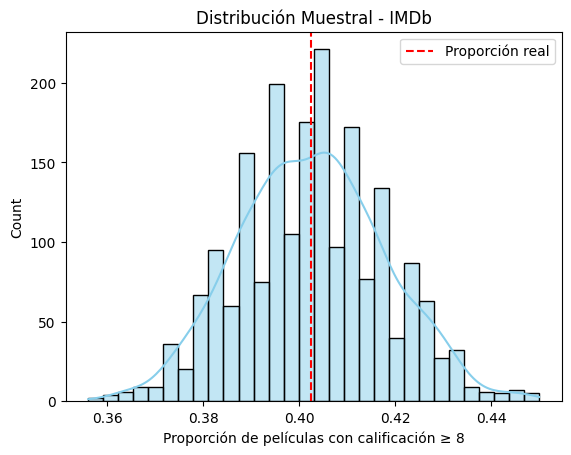

In [7]:
# Simulación de distribución muestral
n = 500
simulaciones = 2000
proporciones = []
for _ in range(simulaciones):
    muestra = df_imdb.sample(n=n, replace=False)
    prop = muestra['alta_calificacion'].mean()
    proporciones.append(prop)

sns.histplot(proporciones, bins=30, kde=True, color='skyblue')
plt.axvline(true_prop, color='red', linestyle='--', label='Proporción real')
plt.title('Distribución Muestral - IMDb')
plt.xlabel('Proporción de películas con calificación ≥ 8')
plt.legend()
plt.show()

## 🍷 Ejemplo 2: Vino – Proporción de vinos con calidad ≥ 7

In [8]:
# Cargar datos de vino
url_wine = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df_wine = pd.read_csv(url_wine, sep=';')
# Variable binaria: vino bueno
df_wine['vino_bueno'] = df_wine['quality'] >= 7
true_prop_wine = df_wine['vino_bueno'].mean()
true_prop_wine

np.float64(0.1357098186366479)

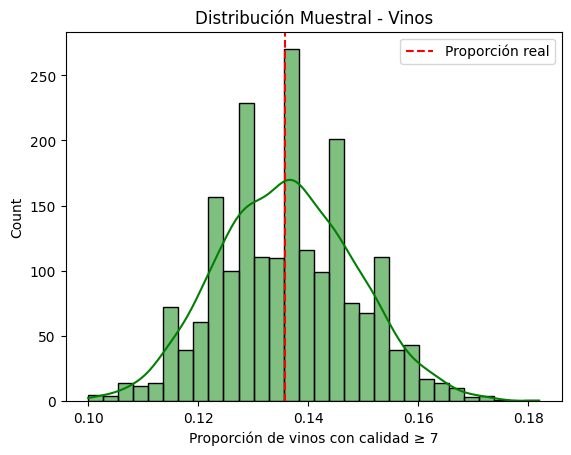

In [9]:
# Simulación
proporciones_wine = []
for _ in range(simulaciones):
    muestra = df_wine.sample(n=n, replace=False)
    prop = muestra['vino_bueno'].mean()
    proporciones_wine.append(prop)

sns.histplot(proporciones_wine, bins=30, kde=True, color='green')
plt.axvline(true_prop_wine, color='red', linestyle='--', label='Proporción real')
plt.title('Distribución Muestral - Vinos')
plt.xlabel('Proporción de vinos con calidad ≥ 7')
plt.legend()
plt.show()

## 🧠 Interpretación
1. Las distribuciones simuladas se aproximan a una curva normal.
2. Esto confirma el Teorema Central del Límite (TCL): la media de muchas muestras sigue una distribución normal, incluso si los datos originales no lo son.
3. A mayor tamaño de muestra, menor dispersión de la distribución muestral.
4. Podemos usar esta propiedad para construir intervalos de confianza y hacer inferencias sobre proporciones poblacionales.